## **การจัดกลุ่มและนำเสนอข้อมูล**

เช่นเดียวกับบทเรียนเรื่อง "การสุ่มตัวอย่าง" ในบทนี้ชุดข้อมูลที่ใช้คือ "titanic.csv" ซึ่งเป็นข้อมูลของผู้โดยสารเรือไททานิคมีรายละเอียดของแต่ละคอลัมน์ดังนี้: 

PassengerId: ID ของผู้โดยสาร
Survived: ผู้โดยสารรอด (1) หรือเสียชีวิต (0)  
Pclass: ชนชั้นของผู้โดยสาร first class (1), second class (2), third class (3)  
Name: ชื่อ-สกุล  
Sex: เพศ    
Age: อายุ  
SibSp: จำนวนพี่น้อง (siblings) และคู่สมรส (spouse) ที่เดินทางมาด้วย    
Parch:  จำนวนบิดา-มารดา (parent) และบุตร (child) ที่เดินทางมาด้วย  
Ticket: รหัสตั๋วโดยสาร  
Fare: ค่าตั๋วโดยสาร  
Cabin: รหัสห้องผู้โดยสาร  
Embarked: ท่าเรือต้นทาง Southampton (S), Cherbourg (C), และ Queenstown (Q)  


\
ทำการ import library ที่ต้องใช้:

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
df = pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


####  
#### **การแจกแจงความถี่ (frequency distribution)**

\
สนใจวิเคราะห์ข้อมูลอายุของผู้โดยสารเรือไททานิค

เนื่องจากในบทนี้จะใช้ข้อมูลอายุเป็นหลัก จึงต้องกรองให้มีเฉพาะผู้โดยสารที่มีข้อมูลอายุเท่านั้น:

In [9]:
df = df[df.Age.notnull()]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  714 non-null    int64  
 1   Survived     714 non-null    int64  
 2   Pclass       714 non-null    int64  
 3   Name         714 non-null    object 
 4   Sex          714 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        714 non-null    int64  
 7   Parch        714 non-null    int64  
 8   Ticket       714 non-null    object 
 9   Fare         714 non-null    float64
 10  Cabin        185 non-null    object 
 11  Embarked     712 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.5+ KB


\
สร้างกราฟแจกแจงความถี่ของข้อมูลอายุ:

<AxesSubplot:xlabel='Age', ylabel='Count'>

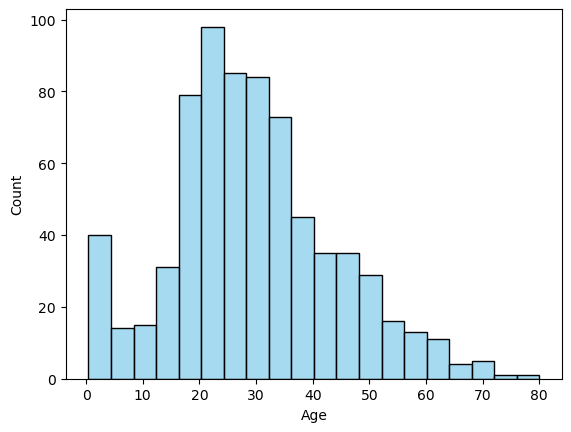

In [10]:
sns.histplot(data=df,
             x='Age',
             bins='auto',
             color='skyblue')

seaborn เป็น library สำเร็จรูปในการสร้างกราฟต่างๆ โดยใช้คำสั่งที่สั้นและกระชับ จากตัวอย่างข้างต้นใช้คำสั่งเพียงแค่บรรทัดเดียวเท่านั้น  
อย่างไรก็ตาม ***การเข้าถึงข้อมูลของกราฟที่แสดงนั้นทำได้ยาก*** เช่น จากกราฟข้างต้น การเข้าถึงข้อมูลจำนวนชั้น (k) และความถี่ที่เป็นตัวเลขของแต่ละชั้นก็ทำได้ยาก

\
ที่จริงแล้ว seaborn เป็น library ที่สร้างขึ้นจากการต่อยอด library อื่นๆเข้าด้วยกัน หนึ่งใน library ที่เป็นพื้นฐานหลักของ seaborn ก็คือ numpy  
seaborn.histplot เป็นตัวต่อยอดเพื่อสร้างกราฟฟิกจาก np.histogram ดังนั้นการที่จะเข้าถึงข้อมูลจำนวนชั้น และความถี่ที่เป็นตัวเลขของแต่ละชั้นต้องใช้ np.histogram

In [14]:
freq, bins = np.histogram(df.Age, bins='auto') 
#Maximum of the ‘sturges’ and ‘Freedman Diaconis’ estimators
#see https://numpy.org/doc/stable/reference/generated/numpy.histogram_bin_edges.html#numpy.histogram_bin_edges

\
จำนวนชั้น bins='auto' จะเป็นการเลือกจำนวนชั้นที่มากสุดระหว่างสูตรของ Sturges หรือ Freedman Diaconis  

จำนวนชั้น:

In [15]:
bins

array([ 0.42 ,  4.399,  8.378, 12.357, 16.336, 20.315, 24.294, 28.273,
       32.252, 36.231, 40.21 , 44.189, 48.168, 52.147, 56.126, 60.105,
       64.084, 68.063, 72.042, 76.021, 80.   ])

\
ความถี่ของแต่ละชั้น:

In [ ]:
freq

array([40, 14, 15, 31, 79, 98, 85, 84, 73, 45, 35, 35, 29, 16, 13, 11,  4,
        5,  1,  1])

\
สร้างตารางแจกแจงความถี่:

In [16]:
#ช่วงอายุ
age_range=[]
for i in range(len(bins)-1):
    age_range.append(f"[{bins[i]:.3f}-{bins[i+1]:.3f})")

#ตารางแจกแจงความถี่
freq_tab = pd.DataFrame({
    "Age":age_range,
    "frequency":freq
})

freq_tab

,Age,frequency
0,[0.420-4.399),40
1,[4.399-8.378),14
2,[8.378-12.357),15
3,[12.357-16.336),31
4,[16.336-20.315),79
5,[20.315-24.294),98
6,[24.294-28.273),85
7,[28.273-32.252),84
8,[32.252-36.231),73
9,[36.231-40.210),45


\
หากใช้สูตรของ Doane:

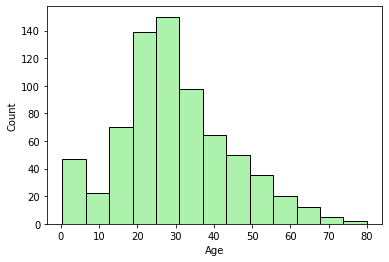

In [ ]:
sns.histplot(data=df,
             x='Age',
             bins='doane',
             color='lightgreen')

In [ ]:
freq, bins = np.histogram(df.Age, bins='doane') 

\
จำนวนชั้น bins='auto' จะเป็นการเลือกจำนวนชั้นที่มากสุดระหว่างสูตรของ Sturges หรือ Freedman Diaconis  

จำนวนชั้น:

In [ ]:
bins

array([ 0.42      ,  6.54153846, 12.66307692, 18.78461538, 24.90615385,
       31.02769231, 37.14923077, 43.27076923, 49.39230769, 55.51384615,
       61.63538462, 67.75692308, 73.87846154, 80.        ])

\
ความถี่ของแต่ละชั้น:

In [ ]:
freq

array([ 47,  22,  70, 139, 150,  98,  64,  50,  35,  20,  12,   5,   2])

\
สร้างตารางแจกแจงความถี่:

In [ ]:
#ช่วงอายุ
age_range=[]
for i in range(len(bins)-1):
    age_range.append(f"[{bins[i]:.3f}-{bins[i+1]:.3f})")

#ตารางแจกแจงความถี่
freq_tab = pd.DataFrame({
    "Age":age_range,
    "frequency":freq
})

freq_tab

,Age,frequency
0,[0.420-6.542),47
1,[6.542-12.663),22
2,[12.663-18.785),70
3,[18.785-24.906),139
4,[24.906-31.028),150
5,[31.028-37.149),98
6,[37.149-43.271),64
7,[43.271-49.392),50
8,[49.392-55.514),35
9,[55.514-61.635),20


####   
#### **ตัวอย่างการนำเสนอข้อมูล**

\
แบ่งกลุ่มข้อมูลตามเพศ:

In [ ]:
df.Sex.value_counts(dropna=False) 
# dropna=False หมายถึงหากมีข้อมูลที่เป็น null หรือ NaN (เรียกอีกอย่างว่า missing data) ให้แสดงด้วย
# ซึ่งในที่นี้ไม่มี missing data

male      453
female    261
Name: Sex, dtype: int64

\
แสดงข้อมูลเพศในรูปแบบกราฟแท่ง:

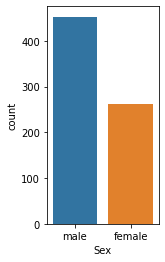

In [ ]:
fig, axes = plt.subplots(figsize=(2,4))  #1 row, 2 columns
sns.countplot(data=df,
              x='Sex',
            )

\
แสดงข้อมูลเพศในรูปแบบแผนภาพวงกลม:

([<matplotlib.patches.Wedge at 0x154d44040>,
 [Text(-0.4509447427781559, 1.0033189118922972, 'male'),
  Text(0.49193971939435155, -1.0945297220643242, 'female')],
 [Text(-0.2459698596971759, 0.547264861032162, '63%'),
  Text(0.2869648363133717, -0.6384756712041891, '37%')])

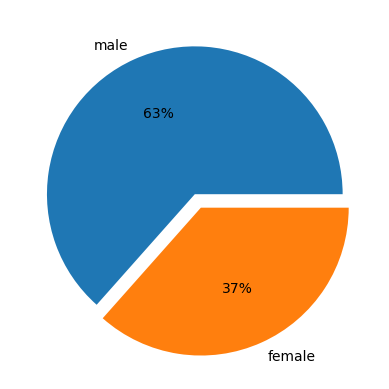

In [18]:
plt.pie(x=[453, 261],
        labels=['male', 'female'],
        autopct='%.0f%%',
        explode=[0,0.1]
        )

\
ข้อมูลยอดขายผลิตภัณฑ์ของบริษัทแห่งหนึ่ง:

In [21]:
sale = {}
sale['Year'] = [2021, 2021, 2021, 2021, 2021, 2022, 2022, 2022, 2022, 2022]
sale['Month'] = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jan', 'Feb', 'Mar', 'Apr', 'May']
sale['Sales'] = [15, 12, 17, 26, 35, 57, 45, 32, 24, 18] 
df_sale = pd.DataFrame(sale)
df_sale

#สามารถเขียนได้อีกแบบคือ
#df_sale = pd.DataFrame({
#    'Year':[2021, 2021, 2021, 2021, 2021, 2022, 2022, 2022, 2022, 2022],
#    'Month':['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jan', 'Feb', 'Mar', 'Apr', 'May'],
#    'Sales':[15, 12, 17, 26, 35, 57, 45, 32, 24, 18] 
#})

,Year,Month,Sales
0,2021,Jan,15
1,2021,Feb,12
2,2021,Mar,17
3,2021,Apr,26
4,2021,May,35
5,2022,Jan,57
6,2022,Feb,45
7,2022,Mar,32
8,2022,Apr,24
9,2022,May,18


\
แสดงแผนภาพเชิงเส้นเดี่ยวของข้อมูลยอดขาย:

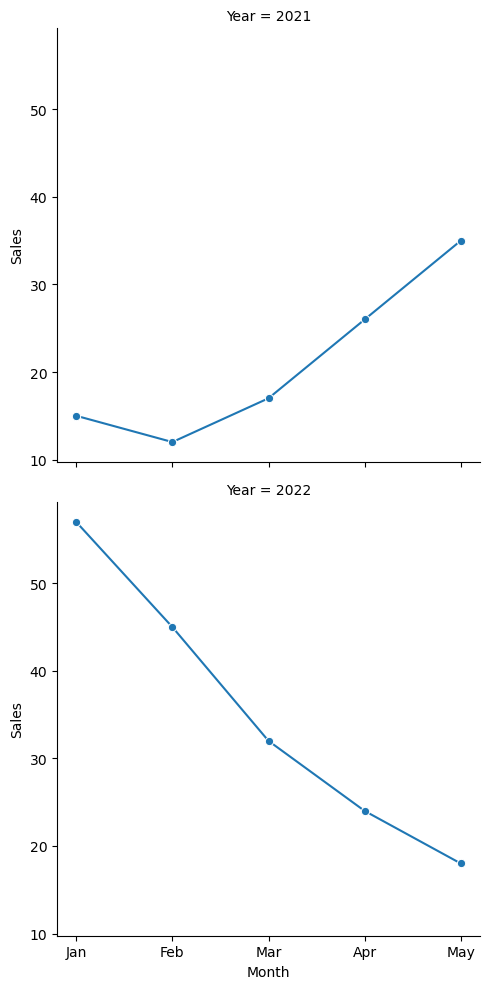

In [24]:
sns.relplot(data=df_sale,
            kind='line',
            markers=True,
            marker='o',
            x='Month',
            y='Sales',
            row='Year')

\
แสดงแผนภาพเชิงเส้นซ้อนของข้อมูลยอดขาย:

<AxesSubplot:xlabel='Month', ylabel='Sales'>

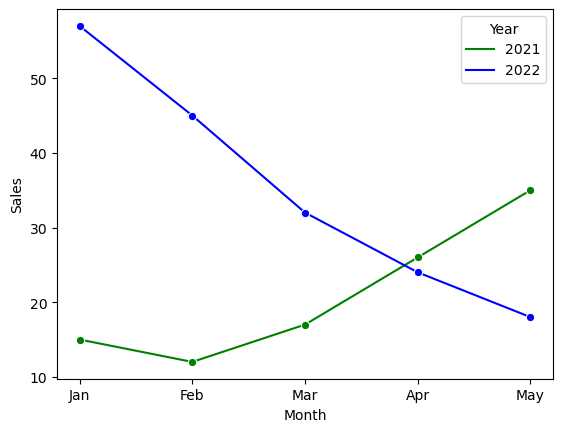

In [25]:
sns.lineplot(data=df_sale,
            markers=True,
            marker='o',
            x='Month',
            y='Sales',
            palette=['g', 'b'],
            hue='Year')

In [27]:
print("55")

55
